In [1]:
import pandas as pd
import numpy as np

# Load the files
proportions = pd.read_csv('deconvolved_cell_type_proportions.csv')
profiles = pd.read_csv('deconvolved_gene_expression_profiles.csv')

# Basic inspection commands
print("=== Cell Type Proportions ===")
print(proportions.head())
print("\nShape:", proportions.shape)
print("\nColumns:", proportions.columns.tolist())

print("\n=== Gene Expression Profiles ===")
print(profiles.head())
print("\nShape:", profiles.shape)
print("\nColumns:", profiles.columns.tolist())

=== Cell Type Proportions ===
   Unnamed: 0         1    2         3         4         5         6  \
0           1  0.000000  0.0  0.000000  0.000000  0.604128  0.086992   
1           2  0.138796  0.0  0.201821  0.175495  0.000000  0.237677   
2           3  0.000000  0.0  0.063656  0.066810  0.390853  0.100649   
3           4  0.000000  0.0  0.000000  0.000000  0.843295  0.000000   
4           5  0.105994  0.0  0.175407  0.192714  0.000000  0.285919   

          7         8         9  
0  0.182691  0.000000  0.126189  
1  0.246211  0.000000  0.000000  
2  0.112371  0.082064  0.183596  
3  0.156705  0.000000  0.000000  
4  0.239967  0.000000  0.000000  

Shape: (3798, 10)

Columns: ['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

=== Gene Expression Profiles ===
   Unnamed: 0            V1            V2            V3        V4  \
0           1  3.720076e-41  3.720076e-41  3.720076e-41  0.002102   
1           2  3.720076e-41  3.720076e-41  3.720076e-41  0.001192   
2  

In [2]:
# Clean up the proportions data
# Remove the 'Unnamed: 0' column and rename columns to more meaningful names
proportions = proportions.drop('Unnamed: 0', axis=1)
cell_type_names = [f'Cell_Type_{i}' for i in range(1,10)]  # Create meaningful column names
proportions.columns = cell_type_names

# Basic statistics for cell type proportions
print("=== Cell Type Proportion Statistics ===")
print(proportions.describe())

# Check which cell types are most prevalent
print("\n=== Average Cell Type Proportions ===")
mean_proportions = proportions.mean().sort_values(ascending=False)
print(mean_proportions)

# Count spots where each cell type is present (proportion > 0)
print("\n=== Number of spots with each cell type present ===")
presence_counts = (proportions > 0).sum()
print(presence_counts)

=== Cell Type Proportion Statistics ===
       Cell_Type_1  Cell_Type_2  Cell_Type_3  Cell_Type_4  Cell_Type_5  \
count  3798.000000  3798.000000  3798.000000  3798.000000  3798.000000   
mean      0.141826     0.101242     0.094928     0.104899     0.118816   
std       0.097386     0.123215     0.107358     0.065801     0.178385   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.070502     0.000000     0.000000     0.068036     0.000000   
50%       0.137532     0.066620     0.067443     0.105816     0.000000   
75%       0.215702     0.159807     0.148995     0.145063     0.188921   
max       0.381549     0.550089     0.442596     0.355924     1.000000   

       Cell_Type_6  Cell_Type_7  Cell_Type_8  Cell_Type_9  
count  3798.000000  3798.000000  3798.000000  3798.000000  
mean      0.105077     0.115593     0.100918     0.116702  
std       0.085550     0.083337     0.086296     0.093810  
min       0.000000     0.000000     0.000000     0.00

In [3]:
import stlearn as st
import scanpy as sc

/home/mnik/miniconda3/envs/stlearn/lib/python3.8/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [4]:
data = st.Read10X(path="/mnt/c/Users/Nikhil/Downloads/BCBA/V1_Breast_Cancer_Block_A_Section_1_spatial")

/home/mnik/miniconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/mnik/miniconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
data.var_names_make_unique()
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [6]:
st.em.run_pca(data,n_comps=10,random_state=0)
st.pp.neighbors(data,n_neighbors=15,use_rep='X_pca',random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


2024-11-26 12:00:59.092359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 12:00:59.384192: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-26 12:00:59.384212: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-26 12:01:00.450476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


Applying Louvain cluster ...
Louvain cluster is done! The labels are stored in adata.obs['louvain']


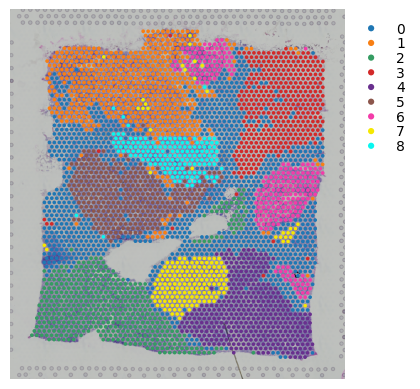

In [7]:
st.tl.clustering.louvain(data,random_state=0, resolution=0.4)
st.pl.cluster_plot(data,use_label="louvain",image_alpha=1,size=7)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
proportions = pd.read_csv('/mnt/c/Users/Nikhil/Downloads/deconvolved_cell_type_proportions.csv')

In [11]:
data

AnnData object with n_obs × n_vars = 3798 × 22240
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'louvain'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'louvain', 'louvain_colors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [12]:
data.obs

,in_tissue,array_row,array_col,imagecol,imagerow,louvain
AAACAAGTATCTCCCA-1,1,50,102,1437.953781,1314.933980,0
AAACACCAATAACTGC-1,1,59,19,502.640259,1489.603946,2
AAACAGAGCGACTCCT-1,1,14,94,1349.092396,609.158410,3
AAACAGGGTCTATATT-1,1,47,13,435.478544,1254.290416,0
AAACAGTGTTCCTGGG-1,1,73,43,772.524745,1764.521435,2
...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,1157.013190,941.996690,8
TTGTTTCACATCCAGG-1,1,58,42,761.798672,1470.462032,2
TTGTTTCATTAGTCTA-1,1,60,30,626.485142,1509.405926,2
TTGTTTCCATACAACT-1,1,45,27,593.234318,1215.346522,0


In [39]:
data

AnnData object with n_obs × n_vars = 3798 × 22240
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'louvain', 'Cell_Type_1', 'Cell_Type_2', 'Cell_Type_3', 'Cell_Type_4', 'Cell_Type_5', 'Cell_Type_6', 'Cell_Type_7', 'Cell_Type_8', 'Cell_Type_9', 'spatial_domains'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'louvain', 'louvain_colors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [14]:
proportions

,Unnamed: 0,1,2,3,4,5,6,7,8,9
0,1,0.000000,0.000000,0.000000,0.000000,0.604128,0.086992,0.182691,0.000000,0.126189
1,2,0.138796,0.000000,0.201821,0.175495,0.000000,0.237677,0.246211,0.000000,0.000000
2,3,0.000000,0.000000,0.063656,0.066810,0.390853,0.100649,0.112371,0.082064,0.183596
3,4,0.000000,0.000000,0.000000,0.000000,0.843295,0.000000,0.156705,0.000000,0.000000
4,5,0.105994,0.000000,0.175407,0.192714,0.000000,0.285919,0.239967,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
3793,3794,0.179680,0.081145,0.116692,0.178942,0.000000,0.109609,0.123210,0.091592,0.119131
3794,3795,0.061285,0.000000,0.102781,0.130404,0.000000,0.229400,0.236717,0.067780,0.171633
3795,3796,0.112815,0.000000,0.252554,0.136298,0.000000,0.263559,0.234775,0.000000,0.000000
3796,3797,0.000000,0.000000,0.000000,0.000000,0.289360,0.203918,0.195308,0.124506,0.186907


In [46]:
proportions['2']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3793    0.081145
3794    0.000000
3795    0.000000
3796    0.000000
3797    0.386664
Name: 2, Length: 3798, dtype: float64

In [52]:
proportions.index = data.obs.index

In [53]:
# Add multiple cell type proportions
for i in range(1, 10):  # assuming 9 columns as you mentioned
    data.obs[f'Cell_Type_{i}'] = proportions[str(i)]

In [54]:
data.obs

,in_tissue,array_row,array_col,imagecol,imagerow,louvain,Cell_Type_1,Cell_Type_2,Cell_Type_3,Cell_Type_4,Cell_Type_5,Cell_Type_6,Cell_Type_7,Cell_Type_8,Cell_Type_9
AAACAAGTATCTCCCA-1,1,50,102,1437.953781,1314.933980,0,0.000000,0.000000,0.000000,0.000000,0.604128,0.086992,0.182691,0.000000,0.126189
AAACACCAATAACTGC-1,1,59,19,502.640259,1489.603946,2,0.138796,0.000000,0.201821,0.175495,0.000000,0.237677,0.246211,0.000000,0.000000
AAACAGAGCGACTCCT-1,1,14,94,1349.092396,609.158410,3,0.000000,0.000000,0.063656,0.066810,0.390853,0.100649,0.112371,0.082064,0.183596
AAACAGGGTCTATATT-1,1,47,13,435.478544,1254.290416,0,0.000000,0.000000,0.000000,0.000000,0.843295,0.000000,0.156705,0.000000,0.000000
AAACAGTGTTCCTGGG-1,1,73,43,772.524745,1764.521435,2,0.105994,0.000000,0.175407,0.192714,0.000000,0.285919,0.239967,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,1157.013190,941.996690,8,0.179680,0.081145,0.116692,0.178942,0.000000,0.109609,0.123210,0.091592,0.119131
TTGTTTCACATCCAGG-1,1,58,42,761.798672,1470.462032,2,0.061285,0.000000,0.102781,0.130404,0.000000,0.229400,0.236717,0.067780,0.171633
TTGTTTCATTAGTCTA-1,1,60,30,626.485142,1509.405926,2,0.112815,0.000000,0.252554,0.136298,0.000000,0.263559,0.234775,0.000000,0.000000
TTGTTTCCATACAACT-1,1,45,27,593.234318,1215.346522,0,0.000000,0.000000,0.000000,0.000000,0.289360,0.203918,0.195308,0.124506,0.186907


In [45]:
data

AnnData object with n_obs × n_vars = 3798 × 22240
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'louvain', 'Cell_Type_1', 'Cell_Type_2', 'Cell_Type_3', 'Cell_Type_4', 'Cell_Type_5', 'Cell_Type_6', 'Cell_Type_7', 'Cell_Type_8', 'Cell_Type_9', 'spatial_domains'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'louvain', 'louvain_colors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [57]:
data.write_h5ad("BCBA_data_plus_9_cell_types.h5ad")